In [ ]:
#Import relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

In [28]:
import pandas as pd
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

# Change the directory to the correct path
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis\data')
print("New working directory:", os.getcwd())

# List all files in the directory to confirm the presence of the file
print("Files in directory:", os.listdir())

# Load the dataset with the correct filename
df = pd.read_csv('sierraleone-bumbuna.csv')

# Display the first few rows of the dataset
print(df.head())



Current working directory: C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis\data
New working directory: C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis\data
Files in directory: ['.ipynb_checkpoints', 'benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002 

In [14]:
# Understand the shape 
df.shape

(525600, 20)

In [15]:
# Overview of the varbiables
df.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [5]:
#columns in the dataset.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [16]:
#  data types of columns.
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
WD_rad           float64
dtype: object

In [8]:
# A general description of the dataset.
df.describe


<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

In [17]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = df[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [10]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [11]:
#check for duplicated values. 
df.loc[df.duplicated()]
#values are duplicated.

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB


In [12]:
#a summary statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,0.000923,153.435172,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,0.030363,102.332842,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,0.000000,59.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,0.000000,181.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,0.000000,235.100000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,1.000000,360.000000,2.500000,81.000000,72.500000


In [18]:
#check for the existence of outliers using Z-score method 
from scipy.stats import zscore  # Import the zscore function
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 89
Number of outliers in DNI: 0
Number of outliers in DHI: 3738
Number of outliers in ModA: 27
Number of outliers in ModB: 63
Number of outliers in Tamb: 0
Number of outliers in RH: 0
Number of outliers in WS: 3109
Number of outliers in WSgust: 3500
Number of outliers in WSstdev: 5653
Number of outliers in Cleaning: 485
Number of outliers in WD: 0
Number of outliers in Precipitation: 1402
Number of outliers in TModA: 10
Number of outliers in TModB: 98
Number of remaining outliers after replacement: 6064


In [14]:
#there are some outliers still left in some columns so  try to remove these remaining outliers.
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 1
Number of outliers in DNI: 0
Number of outliers in DHI: 1932
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in WD: 0
Number of remaining outliers after replacement: 1030


In [16]:
# Statistical check for outliers using the summary statistics.
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,Cleaning,WD,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.0,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.340468,167.187516,108.768126,236.524528,228.737160,28.179683,54.487969,2.082432,2.753556,0.462676,0.0,153.435172,0.000454,35.245072,32.463977
std,330.865639,261.710501,150.385064,326.815176,316.357415,5.924297,28.073069,1.521898,1.913075,0.249952,0.0,102.332842,0.006724,14.805982,12.337904
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,0.0,59.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,0.500000,4.500000,4.300000,28.000000,55.100000,1.900000,2.400000,0.500000,0.0,181.000000,0.000000,30.000000,28.900000
75%,482.900000,314.200000,207.700000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,0.0,235.100000,0.000000,46.900000,41.500000
max,1232.000000,952.300000,569.600000,1215.000000,1177.000000,43.800000,100.000000,6.900000,8.700000,1.200000,0.0,360.000000,0.100000,79.600000,69.500000


Analysis


Time series analysis

In [17]:
# Overview of the relevant columns
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


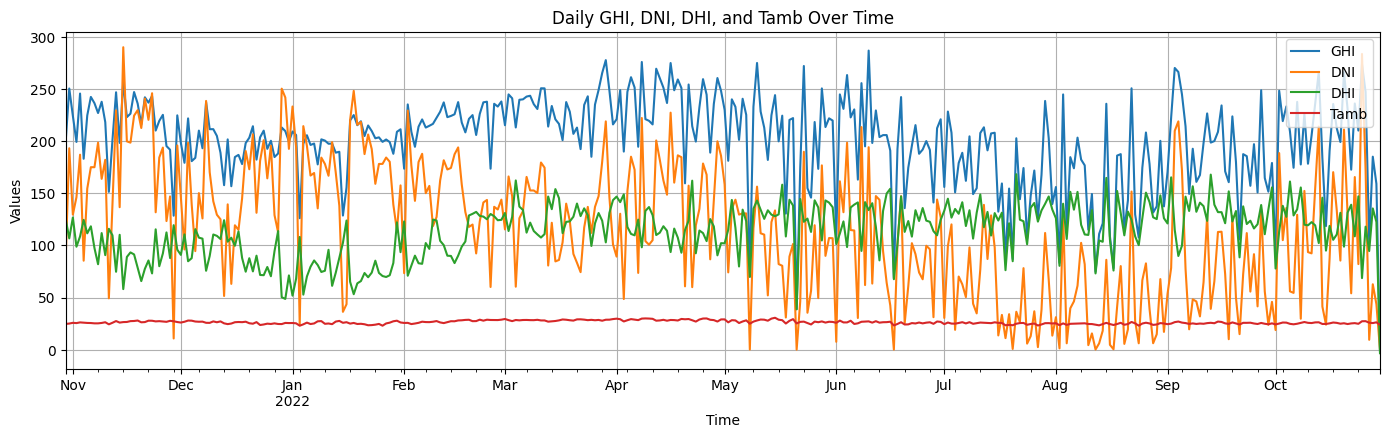

In [4]:


# Assuming the DataFrame df is already loaded and 'Timestamp' is set as the index

# Resample the data by day or month to observe patterns
df_daily = df.resample('D').mean()
df_monthly = df.resample('ME').mean()  # Use 'ME' for end of month resampling

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check the current working directory and change if necessary
print("Current working directory:", os.getcwd())
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis\data')
print("New working directory:", os.getcwd())

# Load the dataset
df = pd.read_csv('sierraleone-bumbuna.csv')

# Display the first few rows of the dataset
print(df.head())

# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Define a custom color palette
custom_palette = {
    0: 'blue',    # Color for Cleaning status 0
    1: 'orange',  # Color for Cleaning status 1
}

# Plot ModA sensor readings over time, colored by the 'Cleaning' column
plot1 = sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette=custom_palette, linewidth=1.5, legend=False)

# Plot ModB sensor readings over time, colored by the 'Cleaning' column
plot2 = sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette=custom_palette, linewidth=1.5, legend=False)

# Add titles and labels
plt.title('Impact of Cleaning (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]

plt.legend(custom_lines, ['Cleaning 0', 'Cleaning 1'], title='Cleaning Status')

# Show the plot
plt.show()


Correlational analysis

In [ ]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation  and Temperature ')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()

Wind analysis
 investigates the trends and significant wind event by showcasing the distribution of wind speed, direction, and variability of wind direction. It utilizes olar plots to show the trends

In [ ]:
# Ensure you have the relevant columns in the DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis')
print(os.getcwd())
df = pd.read_csv(r'data\sierraleone-bumbuna')
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='w', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()



Temprature analysis

In [ ]:
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()

Histograms

In [ ]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='yellow')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()